# COGS 118A - Final Project


## Group members

- Neil Bajaj
- Ria Singh
- Pratheek Sankeshi 
- Shenova Davis

# Abstract 
The goal of this project is to predict whether to approve a credit card for an applicant based on a variety of factors that were asked on their application. We will predict using a machine learning algorithm. The data we will be using is from the Kaggle dataset: A Credit Card Dataset for Machine Learning. The link is https://www.kaggle.com/datasets/caesarmario/application-data/. We will be using factors such as Total Income, Education Type, Applicant Age, etc. More will be described in the data section. Furthermore, we will drop unnecessary columns like Owned Phone, Owned Email, etc while also replacing null values to perform EDA. We will then run various supervised machine learning algorithms to create models to predict the data and use the best one. The performance will be measured on how accurately we predict the data against the status column of the data which is whether the application was approved or not. 


__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

As we get deeper into the age of Big Data, we see that, where possible, we are attempting to move from human evaluation to machine learning prediction. There has also been an uptick in the number of credit card defaulters. Using this logic, credit card companies need a new way to decide whether or not to approve credit cards based on prior history. 

A previous study done by Dr. Hemkiran[1] evaluated whether applicants should be approved for a credit card by using a Logistic Regression with and without a grid search technique. They found that using a grid search technique improved the competency of their model. Additionally, they also used an Artificial Neural Network (ANN) and found it to be better than the linear regression model. Another study by Dr. Kibria[2] aimed to create a deep learning model to aid credit card approval decision-making. They also used a logistic regression model and a support vector machine (SVM) model to compare their results. They found that the deep learning model was better than the logistic regression and SVM models. However, the ANN model and deep learning model are more computationally expensive and time-consuming. 

We are attempting to create a predictive machine learning model that models whether or not the application has the right credentials to have their credit card application approved using the following variables: Applicant Gender, Owned property, Total Children, Owned Car, Total Income, Housing Type, Total Family Members, Applicant Age, Education Type, and Family Status. This is to avoid future credit card defaulters. We will use models such as Naive Bayes Classifier, Linear SVM, and Linear Regression and use them to compare our model’s performance as well. 


# Problem Statement

We are building this model to measure if there are any discrepancies when approving credit card applications. We additionally want to check if we could use big data and machine learning to build a model that predicts if a credit card is approved or not. This would take out human bias from the equation and make sure every application is fairly reviewed. Creating a machine learning model will attempt to eliminate the human bias towards race, class, gender, etc - an issue that plagues the financial ratings of individuals. Additionally, a machine-learning system can significantly reduce the human power and costs of a credit card company, increasing revenue. If our model can accurately predict whether an application can be accepted, we could conclude our hypothesis. This problem is quantifiable since we are trying to model a binary predictor. This problem is measurable because we would be using the metric of accuracy to validate the performance of our model. Lastly, our model is replicable because we could run it on different datasets and check its accuracy on each dataset. The model we will create will be composed of supervised machine-learning algorithms and techniques such as logistic regression, linear SVM, K fold validation, etc. We will train our model on previously collected data from credit card companies to understand what attributes make an individual more or less likely to get approved for a credit card. 

# Data

- Link for our data: https://www.kaggle.com/datasets/caesarmario/application-data

- This data set has about 25,100 observations with 21 variables. 

- The variables that will be used are Applicant Gender, Owned property, Total Children, Owned Car, Total Income, Housing Type, Total Family Members, Applicant Age, Education Type,Family Status, Total Good Debt, and Total Bad Debt. 

- The dataset we are using has already been cleaned to drop any data points with null values and yet the dataset remains robust so we will not be addressing it any further.

- We will additionally drop all the features that we will not be using to further declutter the dataset.

- In addition to cleaning we one hot encoded all other categorical data which wasn't already binary which is displayed below





In [20]:
# @hidden_cell
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns    
from matplotlib.pyplot import figure
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#models importing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

#linear svm stuff
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.kernel_ridge import KernelRidge

credit  = pd.read_csv('Application_Data.csv')

#Keeping only the columns we intend on using along with the status 
#column which contains the true status of the applicant

credit = credit[["Applicant_Gender", "Applicant_Age","Owned_Realty",
                 "Total_Children", "Owned_Car", "Total_Income", "Housing_Type",
                 "Total_Family_Members", "Education_Type", "Family_Status", 'Status', 'Total_Bad_Debt', 'Total_Good_Debt']]

In [21]:
credit.head()

,Applicant_Gender,Applicant_Age,Owned_Realty,Total_Children,Owned_Car,Total_Income,Housing_Type,Total_Family_Members,Education_Type,Family_Status,Status,Total_Bad_Debt,Total_Good_Debt
0,M,59,1,0,1,112500,House / apartment ...,2,Secondary / secondary special ...,Married ...,1,0,30
1,F,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,1,0,5
2,F,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,1,0,5
3,F,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,1,0,27
4,F,53,1,0,0,270000,House / apartment ...,1,Secondary / secondary special ...,Single / not married ...,1,0,39



While doing the initial EDA, we realised that our dataset only had 0.4% negative class. To rectify this discrepancy, we used SMOTE to generate data such that the data is split at an even 50% - similar to actual credit card approval rates. However, before running SMOTE we need to One Hot Encode our data.


The data generation results in the total number of data points increasing from 25,000 to 40,000.

Before One Hot Encoding, we check for null or NAN values - as seen below our dataset doesn't have any hence handling them is not required.

In [22]:
credit.isnull().values.any()

False

### One Hot Encoding

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(credit.drop('Status', axis=1), #
                                                    credit['Status'], #Y variable target
                                                    train_size=0.8,
                                                    random_state=123)

categorical_features = ["Applicant_Gender", "Housing_Type", "Education_Type", "Family_Status"]


# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

# Define one-hot encoder and scaler
numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first')  # drop original categorical features, could combine with if binary
#but unnecessary

#creating a preprocessor to add to the pipeline maybe combine this cell into one?
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

### Running Smote

In [24]:
from imblearn.over_sampling import SMOTE

X_train_processed = preprocessor.fit_transform(X_train)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_processed, y_train)

Doing some additional data cleaning

In [29]:

num_columns = list(numerical_columns)

preprocessor.fit(X_train)

#cat_columns = list(categorical_transformer.get_feature_names_out(categorical_columns))
cat_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
column_names = num_columns + cat_columns
column_names = num_columns + cat_columns

X_res_df = pd.DataFrame(X_res, columns=column_names)


[[ 1.1505612  -1.38262266 -0.6654445  ...  0.          0.
   0.        ]
 [-0.62492912 -1.38262266  0.64664626 ...  0.          0.
   0.        ]
 [-1.04269155  0.72326313  0.64664626 ...  0.          0.
   0.        ]
 ...
 [-1.45864057  0.72326313 -0.6654445  ...  0.          0.
   0.        ]
 [-0.76180089  0.72326313 -0.6654445  ...  0.          0.
   0.        ]
 [-1.01202952  0.72326313 -0.6654445  ...  0.          0.
   0.        ]]


In [36]:
X_res_df['Total_Income'].describe()

count    40004.000000
mean        -0.041293
std          1.006789
min         -1.630637
25%         -0.660573
50%         -0.315613
75%          0.299036
max         13.455899
Name: Total_Income, dtype: float64

In [37]:
X_train['Total_Income'].describe()

count    2.010200e+04
mean     1.943165e+05
std      1.026106e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Total_Income, dtype: float64


# @SHENOVA - REWRITE PLS

The reason why they look different and transformed is due to standard scaling 
Standard scaling (also known as standardization) has several benefits:

Normalization of data: Standard scaling transforms the data to have zero mean and unit variance, which helps in normalizing the data. This is particularly useful when the data has different units of measurement or scales.

Better performance of some machine learning algorithms: Some machine learning algorithms like K-nearest neighbors (KNN) and SVM (support vector machines) are sensitive to the scale of the input features. Standard scaling can improve the performance of these algorithms.

Efficient optimization: Many optimization algorithms like gradient descent converge faster when the input features are on the same scale.

Interpretation of coefficients: When performing linear regression or other models with coefficients, standard scaling ensures that the coefficients can be compared fairly, as they are on the same scale.

Overall, standard scaling is a common preprocessing step that can improve the performance of many machine learning models and make the interpretation of results easier.


Due to the reasons above, I believe we should keep standard scaling

This concludes our data cleaning process and make the data ready to be used in our models

# Proposed Solution

Our proposed solution to predicting whether individuals get approved for a credit card and understanding what variables play a role in making that decision is to use classifiers based on the techniques we’ve learnt in class. 
First, we will use k-fold validation to determine our model of choice by validating over logistic classifiers/ regression, naive Bayes, Linear SVM, kernel ridge regression with l1, l2, and elastic net penalty. We will choose the model that gives us the highest accuracy score. 

We are using K-fold validation since with the train-validation-test model split we always run the issue of overfitting on the training data. K-fold validation instead trains and evaluates on all available data by splitting the data amongst each fold training on that and testing on the rest. 

We are using logistic classifiers/ regression, naive Bayes, Linear SVM, and kernel ridge regression since they are machine learning classifiers. Our proposed problem is to predict whether to approve a credit card for an applicant based on a variety of factors that were asked on their application. This is a yes or no question which makes it a binary classification task. As a result, it makes a lot of sense to use machine learning classification algorithms that can also be used to solve binary classification problems like the algorithms above. We are using these specific algorithms since we are familiar with these algorithms and understand how to run and evaluate them effectively. Furthermore, we use L1, L2, and elasticnet penalty on kernel ridge regression since these are regularization terms that will curb overfitting and make generalization better. 

With the chosen model we will validate across parameters. In the case of logistic regression, we will validate over the values of C = [0.01, 0.1, 1, 10, 100] to find our best model. 
For Naive Bayes, we will validate over Gaussian Naive Bayes and Multinomial Naive Bayes and choose our alpha from the following values - [0.01,0.05, 0.1, 0.2, 0.25].

For Linear SVM, we will validate over different kernel functions - 'linear', 'poly', 'rbf', and 'sigmoid' and we will choose over values of C = [0.01, 0.1, 1, 10, 100] to find the best model. 

For Kernel Ridge, we will validate over the following values of alpha - [0.01, 0.1, 1.0, 10.0, 100.0], the kernel functions of linear, polynomial, and RBF and related kernel-specific parameters.

Our extensive search over the models and their parameters will make our classification model accurate. As our dataset is not super large, we are not as concerned about computational efficiency - something to improve on while expanding on the project. 

We will finally train our model and test it to see its accuracy and compare it to existing models available on Kaggle to compare our performance. We will set up a confusion matrix to see how the model fares and plot the ROC/AUC. 


# Evaluation Metrics

We will use both precision and recall metrics to evaluate our model as both false negatives and false positives are of significant concern to our model. A credit card company would need to maximize eligible customers to increase revenue by minimizing the number of false negatives and also would need to minimize the number of individuals who may default to cut losses hence minimizing the false positives. Since neither one of the metrics is more important to our model, we will additionally use the f1 score which incorporates both precision and recall to finally measure the performance of our model. 

## Add picture here instead of formulas!!
Precision is defined as Correctly Classified Positives / Predicted Positives. It helps gauge false positivity rates

Recall is defined as Correctly Classfied Positives/ All True Positives.

F1 score is 2(Correctly Classified Positives)/2(Correctly Classified Positives) + False Positive + False Negative

Accuracy is defined as Correctly Classified data/ All data. 


# Results

After cleaning and balancing our dataset,we proceed to train and validate our data on the training set using repeated KFold crossvalidation where K=5. We choose repeated K-Fold(5X5) over 25 fold as it provides less variance and higher accuracy as seen by the graph below.


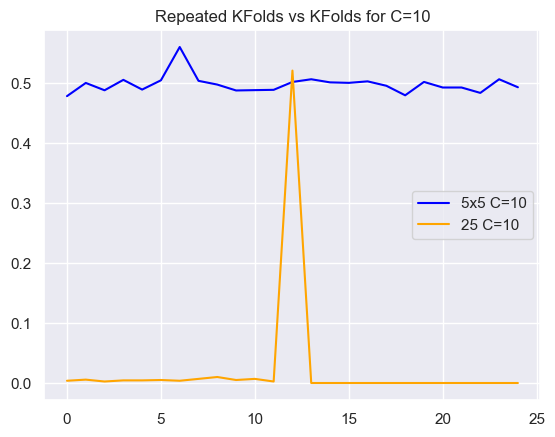

The code below is the baseline model we created where applicants with income higher than median income of the dataset get approved for the credit card.

In [35]:
train_income_mean = X_train['Total_Income'].mean()


Baseline = [1 if i >= train_income_mean else 0 for i in X_train['Total_Income']]
X_train['prediction'] = Baseline


y_true_num = list(y_train)
y_pred_num = list(X_train['prediction'])

fp = 0
tp = 0
fn = 0
tn = 0

tpPoints = []
xTp = []
fpPoints = []
xFp = []
fnPoints = []
xFn = []
tnPoints = []
xTn = []

for i in range (len(y_true_num)):
    if y_true_num[i] == 1 and y_pred_num[i] == 1:
        tp += 1
        tpPoints.append(credit['Total_Income'].iloc[i])
        xTp.append(i)
        #tpPoints.append(credits['Total_Income'][i]) #fix this doesnt make sense
    if y_true_num[i] == 0 and y_pred_num[i] == 1:
        fp += 1
        fpPoints.append(credit['Total_Income'].iloc[i])
        xFp.append(i)
        #fpPoints.append(y_true_)
    if y_true_num[i] == 1 and y_pred_num[i] == 0:
        fn += 1
        fnPoints.append(credit['Total_Income'].iloc[i])
        xFn.append(i)
    if y_true_num[i] == 0 and y_pred_num[i] == 0:
        tn += 1
        tnPoints.append(credit['Total_Income'].iloc[i])
        xTn.append(i)
        

precision = float (tp) / float(tp + fp)
recall = float(tp) / float(tp + fn)
       
print("Precision: ", precision)
print()
print("Recall: ", recall)
print()
print("False Positive: ", fp)
print()
print("False Negative: ", fn)
print()
f1 = 2*precision *recall / (precision + recall)
print("F1 Score: ", f1)

194316.49268729478
Precision:  0.9950829748002459

Recall:  0.4047095290470953

False Positive:  40

False Negative:  11907

F1 Score:  0.5753989408963287


As we can see, the classfier fails to correctly predict positives very well and has an overall low accuracy and F1 score.

### Classifier 1 - Logistic Classifier

#### Finding our best model 

Here are the benefits and cons of each solver:

'saga': This solver supports both L1 and L2 regularization and is capable of handling large datasets. It is recommended when the number of samples is significantly larger than the number of features. However, it may be slower than other solvers when the number of features is large.

'lbfgs': This solver is recommended when the dataset is small or medium-sized. It is a limited-memory quasi-Newton method that uses a line search algorithm. It can handle both L1 and L2 regularization, but it may not be suitable for large datasets.

'newton-cg': This solver is a quasi-Newton method that uses a Hessian matrix approximation. It can handle both L1 and L2 regularization, but it may not be suitable for large datasets.

'sag': This solver is a stochastic gradient descent (SGD) algorithm. It is recommended when the dataset is large and cannot fit into memory. It is fast and can handle both L1 and L2 regularization. However, it may not converge as fast as other solvers.

'newton-cholesky': This solver is a quasi-Newton method that uses a Cholesky decomposition to compute the inverse of the Hessian matrix. It can handle both L1 and L2 regularization, but it may not be suitable for large datasets.

'liblinear': This solver is a linear algorithm that uses a coordinate descent method. It is recommended when the dataset is small or medium-sized and the number of samples is greater than the number of features. It can only handle L1 regularization.


C values: smaller c-value is equal to greater generalization (simpler model) and stronger regularization
but maybe too much while larger could mean greater overfitting (more complex model) and weaker regularization

# @Shenova
The two penalties I will leave to u to write about:


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

onehot = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)])


# Create a pipeline 
pipe = Pipeline([('make_features', preprocessor),
                 ('classifier', LogisticRegression(max_iter=10000))])

search_space = {'classifier__C': np.logspace(-4, 4, 9),
               'classifier__penalty': ['l2', 'l1', 'elasticnet'],
               'classifier__solver': ['saga', 'lbfgs', 'newton-cg', 'sag', 'newton-cholesky', 'liblinear']}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=2, n_jobs=-1)

In [ ]:

# Fit grid search
best_model.fit(X_res, y_res)

### Results

#### possible overfit as results are showing 1.0
##need to paste 

In [ ]:
best_model.best_params_, best_model.best_score_ #maybe too good?

Our Best model is Solver = 'lbfgs',  C = 1000.0,  PENALTY = l2, and accuracy of 100

PASTE PICTURE OF OUTPUT

### Classifier 2 - SVM

'''
We also need to explain why we choose svc rather than svm's other classifiers in sklearn


'classifier__C': np.logspace(-4, 4, 9), <- just the usual C value stuff
               'classifier__kernel': ['linear', 'rbf', 'sigmoid', 'poly'], <-
        'linear': This kernel is a linear transformation that maps the data to a higher-dimensional 
        space using a linear function. It is suitable for linearly separable datasets and works well 
        when there are many features. The 'linear' kernel is computationally efficient and is less prone
        to overfitting than other kernels. However, it may not work well on nonlinear datasets.

        'rbf' (Radial basis function): This kernel is a popular choice for nonlinear datasets. 
        It maps the data to a high-dimensional feature space using a Gaussian function. 
        It can capture complex relationships between features and is very flexible. 
        However, the 'rbf' kernel can be sensitive to the choice of hyperparameters, such as the 
        width of the Gaussian function, and can overfit when the number of features is large.

        'sigmoid': This kernel maps the data to a high-dimensional feature space using a sigmoid 
        function. It is suitable for problems that require a logistic function as a decision function.
        However, the 'sigmoid' kernel is less popular than the other kernels and may not perform as 
        well on many datasets.

        'poly' (Polynomial): This kernel maps the data to a high-dimensional feature space using 
        a polynomial function. It is suitable for datasets with nonlinear relationships between 
        features. However, the 'poly' kernel can be sensitive to the degree of the polynomial 
        and can overfit when the degree is too high. <- was the best before i had to refit the data not sure whats happening
        rn
               
               
               
               
               
            'classifier__gamma': ['scale', 'auto', 0.1, 1, 10] <-Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features

if float, must be non-negative.









'''


In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

onehot = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)])


# Create a pipeline 
pipe = Pipeline([('make_features', preprocessor),
                 ('classifier', SVC())])

# Create search space of hyperparameters
# the variable namespace looks like this
# pipe.classifier.C is represented as 'classifier__C'
# if we'd just chucked a LogisticRegression() in as the model
# instead of a pipe, then we'd only have had 'C' w/o the 'classifier__' bit 
search_space = {'classifier__C': np.logspace(-4, 4, 9),
               'classifier__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
               'classifier__gamma': ['scale', 'auto', 0.1, 1, 10]}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs=-1) #idk why the verbose isnt showing for me anymore
#it just runs


In [ ]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 

best_model.fit(X_res, y_res)

In [ ]:
best_model.best_params_, best_model.best_score_

### Results

Our best model is ....

PASTE RESULTS

### Classifier 3 - Naive Bayes

Naive bayes has no hyperparameter so just explain naive bayes itself

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', GaussianNB())
])

# Create search space of hyperparameters
search_space = {}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)

In [ ]:
# Fit grid search
best_model.fit(X_res, y_res)

In [ ]:
best_model.best_params_, best_model.best_score_

### Results

Our best model is ....

PASTE RESULTS

### Classifier 4 - KNN

the weights are quite literally that uniform is just 1/n and distance values the closer the neighbors 
the more value it willhave

finally the algorithms: 
'auto': This is the default algorithm, which selects the most appropriate algorithm 
based on the characteristics of the data. It is a good choice for most datasets.

Pros:

Automatic selection of the best algorithm based on the input data.
Suitable for most datasets.
Cons:

None.


'ball_tree': This algorithm constructs a ball tree data structure to find the nearest 
neighbors. It is a good choice when the number of features is large compared to the number of samples. #not good for ours

Pros:

Efficient for high-dimensional datasets.
Can be faster than brute force algorithm for some datasets.
Cons:

Slower than brute force algorithm for low-dimensional datasets. Memory-intensive.


'kd_tree': This algorithm constructs a kd-tree data structure to find the nearest neighbors. 
It is a good choice when the number of features is small compared to the number of samples. #good for ours

Pros:

Efficient for low-dimensional datasets.
Can be faster than brute force algorithm for some datasets.
Cons:

Slower than brute force algorithm for high-dimensional datasets.
Memory-intensive.


'brute': This algorithm computes the distances between all pairs of points in the dataset to find the nearest
neighbors. It is a good choice for small datasets. #ok for ours i think kd-tree is better

Pros:

Simple and easy to understand.
Suitable for small datasets.
Cons:

Slow and inefficient for large datasets. Memory-intensive.

In general, the choice of algorithm depends on the size and characteristics of the dataset. 
If the number of features is large, ball tree algorithm may be a good choice, whereas if the number of samples is small and the number of features is low, kd-tree algorithm may be a good choice. If the dataset is small, brute force algorithm may be a good choice. The auto option can be a good


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Create search space of hyperparameters
search_space = {
    'classifier__n_neighbors': range(1, 31),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [ ]:
best_model.fit(X_res, y_res)

In [ ]:
best_model.best_params_, best_model.best_score_

### Results

Our best model is ....

PASTE RESULTS

### Classifier 5 - Kernel Ridge

We covered the kernel values here 

the gamma value  determines the inverse of the width of the kernel function, 
which in turn affects the degree of smoothing of the resulting regression function.

The 'scale' value of the regressor__gamma hyperparameter specifies 
that gamma should be set to 1 / (n_features * X.var()), where n_features is 
the number of features in the input data X. This is equivalent to scaling each feature 
to have unit variance before computing gamma.

The 'auto' value of regressor__gamma specifies that gamma should be set to 1 / n_features. 
This is equivalent to using the median of the distances between all pairs of points in the 
input data X to set the scale of the kernel function.

Finally the alpha value a lower value like 0.001 means weak regularization and more complex model
with greater overfittign and vice versa for values like a 1000

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('regressor', KernelRidge())
])

# Create search space of hyperparameters
search_space = {
    'regressor__alpha': [0.1, 1, 10],
    'regressor__kernel': ['linear', 'rbf', 'polynomial'],
    'regressor__gamma': ['scale', 'auto']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [ ]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search

best_model.fit(X_res, y_res)

In [ ]:

best_model.best_params_, best_model.best_score_

#this method doesnt run well since it takes up too much ram about 7.5 gb of ram and thus isnt possible to do with our systems

Results

### Classifier 6 - Ensemble(AdaBoost)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', AdaBoostClassifier())
])

# Create search space of hyperparameters
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 1, 10],
    'classifier__algorithm': ['SAMME', 'SAMME.R']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [ ]:
%%timeit
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search
best_model.fit(X_res, y_res)

In [ ]:
best_model.best_params_, best_model.best_score_

#### Results

### Classifier 7 - Ensemble(Gradient tree boosting)

estimators and learning rate i covered above
and since its a tree we know what the depth, leaves, and split  means as well
only the max features are left:

The max_features parameter in gradient tree boosting determines the maximum number of 
features to consider when looking for the best split at each node. Here are some pros 
and cons of using different options for this parameter:

Pros of 'auto':

Default value for this parameter
Results in a good balance between bias and variance
Can help avoid overfitting by limiting the number of features considered
Cons of 'auto':

May not always select the most informative features
May result in a slightly higher bias than other options
Pros of 'sqrt':

Generally results in a lower bias than 'auto'
Limits the number of features considered, helping to avoid overfitting
Cons of 'sqrt':

May not always select the most informative features
May result in a slightly higher variance than 'auto'
Pros of 'log2':

Similar to 'sqrt', but may result in an even lower bias
Limits the number of features considered, helping to avoid overfitting
Cons of 'log2':

May not always select the most informative features
May result in a slightly higher variance than 'auto' or 'sqrt'
Overall, the choice of max_features depends on the specific problem and dataset
being analyzed. In general, it is a good idea to try out multiple options
and see which one performs best through cross-validation.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Create search space of hyperparameters
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 1, 10],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [ ]:
%%timeit

#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search

best_model.fit(X_res, y_res)

In [ ]:
best_model.best_params_, best_model.best_score_

### Classifier 8 - Random Forest

In [ ]:
rom sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_res)
categorical_columns = categorical_columns_selector(X_res)

# Define one-hot encoder and scaler
onehot = OneHotEncoder()
scaler = StandardScaler()

# Define preprocessor
preprocessor = ColumnTransformer([
    ('onehot', onehot, categorical_columns),
    ('zscore', scaler, numerical_columns)
])

# Create a pipeline 
pipe = Pipeline([
    ('make_features', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Create search space of hyperparameters
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object to find the best model
best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3, n_jobs = -1)


In [ ]:
#FITTING OUR BEST MODEL 
#FINDING THE BEST ACCUARACY 
#why are we splitting again here? shouldnt we fit on res anyways


# Fit grid search
best_model.fit(X_res, y_res)

In [ ]:
best_model.best_params_, best_model.best_score_

## Final testing
Pick best model and run on test data

# @Neil - can you choose the best model and run it on the test data and paste the results

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

We referenced the ethics checklist at https://deon.drivendata.org. We have no knowledge of the data collection process since we are using a publicly available dataset at Kaggle, however, we do know that no names are part of the dataset since each applicant was identified by their  ID which protects them. One of the ethical issues with this data is that some information such as the name and date of birth can be identifiable,even though this data set has omitted such private information by using unidentifiable id numbers and age instead of the date of birth.  We haven’t gotten towards the modeling or the deployment therefore we can’t answer the ethics of these two yet. However, basing off of our base model we see that false negatives are a large ethical concern for us as many individuals are considered ineligible by just comparing income. Making our model robust with other economic and credit-worthy factors such as car and home ownership as well as number of family members can help predict individuals who can pay off credit debt more accurately. This ethical corncern will get addressed once a more robust and complex model is in place which takes many factors into account. We will continue to monitor this concern within our model by tracking false positivity rates more closely. Additionally, one confounding variable that could impact our data is race. This variable could possibly be biasing our data, however this variable is not tracked within our dataset hence it is difficult to evaluate whether it is biasing our data and hence biaisng our model. This can be resolved if our model is implemented and trained on data which tracks racial characteristics to further understand the bias.


### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Hemkiran, S., et al. “Design of Automatic Credit Card Approval System Using Machine Learning.” SpringerLink, Springer Singapore, 1 Jan. 1970, https://link.springer.com/chapter/10.1007/978-981-16-6448-9_1. <br> 
<a name="admonishnote"></a>2.[^](#admonish): Kibria, Golam, and Mehmet Sevkli. “Application of Deep Learning for Credit Card Approval: A Comparison ...” Application of Deep Learning for Credit Card Approval: A Comparison with Two Machine Learning Techniques, https://www.researchgate.net/profile/Md-Kibria-12/publication/348755769_Application_of_Deep_Learning_for_Credit_Card_Approval_A_Comparison_with_Two_Machine_Learning_Techniques/links/600f495f92851c13fe39bb38/Application-of-Deep-Learning-for-Credit-Card-Approval-A-Comparison-with-Two-Machine-Learning-Techniques.pdf?origin=publication_detail. <br>
<a name="sotanote"></a>3.[^](#sota):Markova, Maya. “Credit Card Approval Model: An Application of Deep Neural Networks.” AIP Publishing, AIP Publishing LLC AIP Publishing, 24 Feb. 2021, https://aip.scitation.org/doi/abs/10.1063/5.0040744?journalCode=apc. 
